## Pre-Processing of Online Shoppers Intention Dataset

### Lisa Patel

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv('EDA_df.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Text(0.5, 1.0, 'Entries per Month')

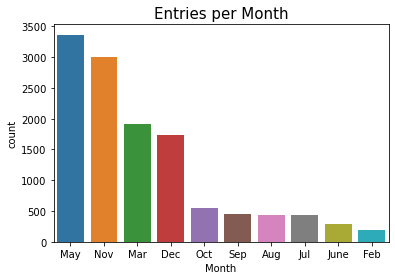

In [5]:
months = df['Month'].value_counts()

sns.countplot(x = df['Month'], order=months.index)
plt.title('Entries per Month', fontsize=15)

In [6]:
df.replace(['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12], inplace = True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


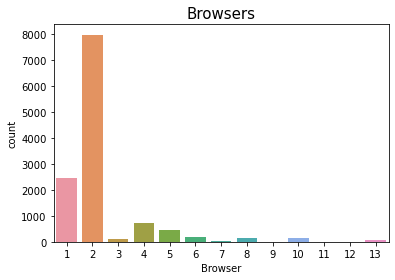

In [7]:
sns.countplot(x = df['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

There is a large majority of users using brower 2 with a smaller number using browser 1. All other browsers only have a small subsection of users. It makes sense to drop this column since it is polarizing and doesn't contribute much to our model. 

In [ ]:
df.replace(['Returning_Visitor', 'New_Visitor', 'Other'], [1 ,2, 3], inplace = True)

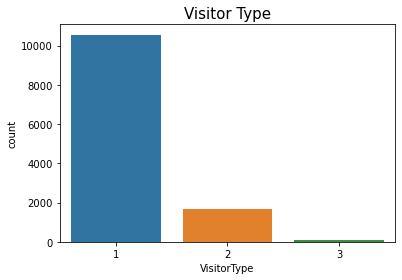

In [9]:
sns.countplot(x = df['VisitorType'])
plt.title('Visitor Type', fontsize=15)
plt.show()

The visitor type column was transformed into a numerical column for the machine learning algorithm. The data is severely skewed towards returning customers, which may affect a models performance. 


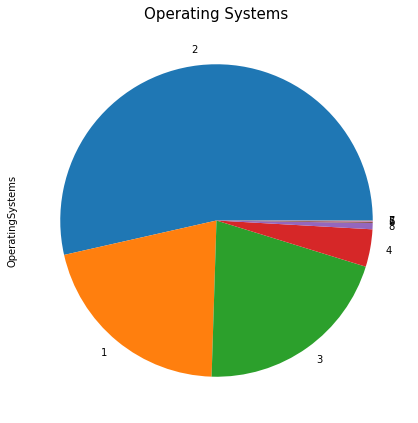

In [11]:
df['OperatingSystems'] = df['OperatingSystems'].replace(['5,6,7,8'],5)
os_plot = df['OperatingSystems'].value_counts().plot.pie(figsize=(7,8))
plt.title('Operating Systems', fontsize=15)
plt.show()

Browsers with low level of users have been consolidated under category 5. A user's operating system for this classification problem does not seem appropriate since it most likely indicates user's having a certain type of computer. Therefore, we will leave this out of the model. 

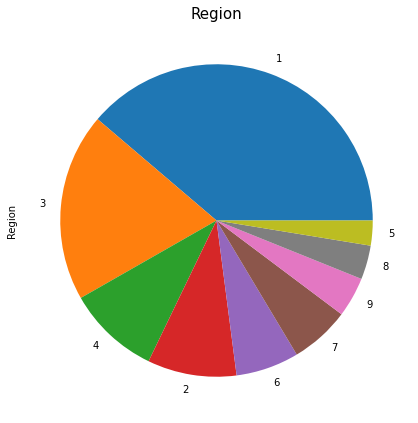

In [12]:
os_plot = df['Region'].value_counts().plot.pie(figsize=(7,8))
plt.title('Region', fontsize=15)
plt.show()

We leave regionality out because the regionality may be slightly tied to purchase likelihood, but we want to train our model on a smaller set of features if possible.

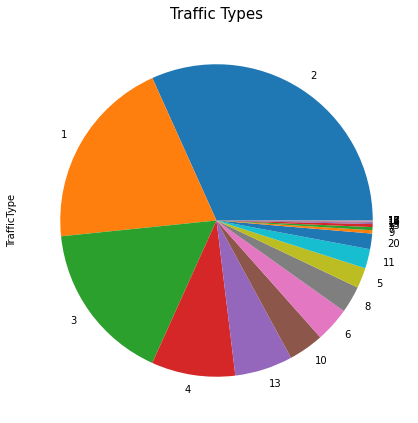

In [13]:
os_plot = df['TrafficType'].value_counts().plot.pie(figsize=(7,8))
plt.title('Traffic Types', fontsize=15)
plt.show()

We will leave this feature out of the model as well since traffic sources are typically not useful for classifying if a user made a purchase. It's typically important for tracking website traffic to determine whether and where to advertise.

### Dropping Columns

In [19]:
df_clean = df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

### One-hot Encoding and Splitting the Data

In [22]:
encoded_visitor = pd.get_dummies(df_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

clean_merged_df = pd.concat([df_clean, encoded_visitor], axis=1).drop(['VisitorType'], axis=1)

In [27]:
clean_merged_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Visitor_Type_2,Visitor_Type_3
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,False,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,False,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,False,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,False,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,False,0,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,False,0,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,False,0,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,False,0,0


In [28]:
X = clean_merged_df.drop('Revenue', axis=1)
y = clean_merged_df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=.25)

At this point, we further examined the usefulness of certain features related to this classification problem and either removed unnessecary one or transformed them into more suitable ones. The dataset was then encoded with one-hot encoding since it made the most sense and split into the appropriate 75/25 train/test sets. 

The next task will be to explore various classification machine learning models. 